In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
# Set seed for reproducibility
np.random.seed(1)

# Define dataset parameters
num_samples = 10000
num_features = 20
outlier_fraction = 0.01
num_outliers = int(num_samples * outlier_fraction)
num_inliers = num_samples - num_outliers

# Generate inliers (99% of data)
inliers = np.random.normal(loc=1, scale=0.01, size=(num_inliers, num_features))

# Generate outliers (1% of data)
outliers = np.random.normal(loc=1, scale=0.01, size=(num_outliers, num_features))
outliers[:, :5] = np.random.normal(loc=0, scale=0.01, size=(num_outliers, 5))  # First 5 features differ

# Combine datasets
X = np.vstack((inliers, outliers))

# Create DataFrame
columns = [f'feature_{i+1}' for i in range(num_features)]
df = pd.DataFrame(X, columns=columns)


In [3]:
X_scaled = df.values

In [4]:
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_scaled)

In [5]:
X_scaled

array([[ 1.01624345e+00,  9.93882436e-01,  9.94718282e-01, ...,
         9.91221416e-01,  1.00042214e+00,  1.00582815e+00],
       [ 9.88993808e-01,  1.01144724e+00,  1.00901591e+00, ...,
         1.00234416e+00,  1.01659802e+00,  1.00742044e+00],
       [ 9.98081644e-01,  9.91123710e-01,  9.92528417e-01, ...,
         1.00931102e+00,  1.00285587e+00,  1.00885141e+00],
       ...,
       [-8.54773162e-03,  6.78936906e-03,  3.67985952e-03, ...,
         9.95463913e-01,  9.88762935e-01,  1.01961538e+00],
       [ 7.58047728e-04, -1.84857161e-02,  2.17033126e-03, ...,
         9.81376856e-01,  1.00195537e+00,  1.01574659e+00],
       [-4.19743244e-02,  7.49750240e-03, -8.17512388e-03, ...,
         1.00833637e+00,  1.00003734e+00,  1.00772198e+00]],
      shape=(10000, 20))

In [ ]:
from src.ocsvm.OneClassSVMClassifier import OneClassSVMClassifier
classifier = OneClassSVMClassifier(X_scaled, nu=0.01)

In [7]:
decision, y_pred = classifier.fit()

[[1.         0.36516658 0.35733592 ... 0.         0.         0.        ]
 [0.36516658 1.         0.4919899  ... 0.         0.         0.        ]
 [0.35733592 0.4919899  1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.25615484 0.36096389]
 [0.         0.         0.         ... 0.25615484 1.         0.17111748]
 [0.         0.         0.         ... 0.36096389 0.17111748 1.        ]]
[0.99999926 0.99999979 0.99999926 ... 0.99999997 0.99999997 0.99999997]
[  16   20   28 ... 9997 9998 9999]
197.91139906357995


In [8]:
counts = {1: np.sum(y_pred == 1), -1: np.sum(y_pred == -1)}
total = len(y_pred)
percentages = {key: (count / total) * 100 for key, count in counts.items()}

results = {key: {"count": counts[key], "percentage": percentages[key]} for key in counts}

print(results)

{1: {'count': np.int64(9000), 'percentage': np.float64(90.0)}, -1: {'count': np.int64(1000), 'percentage': np.float64(10.0)}}


In [9]:
classifier.model.gamma

np.float64(257.712765528199)

In [10]:
all(x < 0 for x in decision[-100:])

True

In [11]:
decision

array([  22.90058182,   88.96113489,   81.70518473, ..., -159.29157529,
       -166.48646347, -165.59361314], shape=(10000,))

In [12]:
indices = [i for i, value in enumerate(y_pred) if value == -1]
print(indices)

[16, 20, 28, 36, 50, 69, 73, 79, 83, 84, 85, 111, 119, 141, 162, 171, 193, 195, 197, 205, 211, 215, 220, 228, 262, 277, 295, 316, 325, 332, 351, 356, 363, 368, 400, 408, 410, 415, 420, 421, 427, 430, 431, 434, 477, 496, 523, 553, 572, 585, 591, 597, 598, 606, 612, 620, 645, 646, 651, 657, 663, 680, 694, 703, 710, 715, 716, 731, 746, 747, 763, 765, 770, 771, 774, 822, 840, 842, 853, 857, 865, 871, 889, 893, 927, 948, 958, 964, 974, 981, 988, 990, 996, 1002, 1004, 1009, 1011, 1017, 1035, 1044, 1056, 1062, 1063, 1074, 1088, 1123, 1151, 1155, 1166, 1196, 1208, 1215, 1220, 1227, 1230, 1236, 1245, 1248, 1253, 1254, 1257, 1268, 1275, 1298, 1310, 1311, 1329, 1335, 1355, 1359, 1398, 1417, 1429, 1431, 1448, 1454, 1458, 1463, 1466, 1477, 1496, 1502, 1504, 1507, 1516, 1528, 1534, 1581, 1605, 1608, 1611, 1621, 1622, 1626, 1647, 1649, 1658, 1663, 1664, 1673, 1690, 1728, 1732, 1736, 1765, 1770, 1772, 1778, 1779, 1780, 1787, 1803, 1805, 1827, 1828, 1829, 1831, 1837, 1845, 1859, 1887, 1900, 1908, 1931,

In [13]:
from sklearn.svm import OneClassSVM
clf = OneClassSVM(gamma=classifier.model.gamma, nu=0.1)

In [14]:
clf.fit(X_scaled)

OneClassSVM(gamma=np.float64(257.712765528199), nu=0.1)

In [15]:
y_pred = clf.predict(X_scaled)

In [16]:
counts = {1: np.sum(y_pred == 1), -1: np.sum(y_pred == -1)}
total = len(y_pred)
percentages = {key: (count / total) * 100 for key, count in counts.items()}

results = {key: {"count": counts[key], "percentage": percentages[key]} for key in counts}

print(results)

{1: {'count': np.int64(8995), 'percentage': np.float64(89.95)}, -1: {'count': np.int64(1005), 'percentage': np.float64(10.05)}}


In [17]:
y_pred

array([ 1,  1,  1, ..., -1, -1, -1], shape=(10000,))

In [18]:
import shap
explainer = shap.KernelExplainer(clf.predict, shap.kmeans(X_scaled, 100))

/home/swathi/micromamba/envs/py311/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
shap_values = explainer.shap_values(X_scaled, nsamples = 100)

100%|██████████| 10000/10000 [1:03:06<00:00,  2.64it/s]


In [28]:
import pickle
with open("shap_values_compare_offmani.pkl", "wb") as f:
    pickle.dump(shap_values, f)

In [ ]:
# with open("shap_values.pkl", "rb") as f:
#     shap_values = pickle.load(f)

In [20]:
# shap_values_1 = explainer(X_scaled)

In [21]:
shap_subset = shap_values[-10:]  # shape: (n_subset, n_features)
X_subset = X_scaled[-10:]

In [22]:
from src.utils.visualisation.deterministic_values import global_bar_plot, local_bar_plot
mean_abs_shap_values = np.abs(X_subset).mean(axis=0) 


In [23]:
mean_abs_shap_values

array([0.01357939, 0.0079054 , 0.00657474, 0.00598554, 0.00614582,
       1.00197485, 0.99995307, 0.99257581, 1.00017613, 0.99817745,
       1.00017789, 1.0008461 , 1.00033402, 0.99818223, 0.99955118,
       1.00096281, 0.99547324, 0.99797238, 0.99952071, 1.01007226])

In [24]:
# local_bar_plot(shap_values, 99, feature_names = columns)

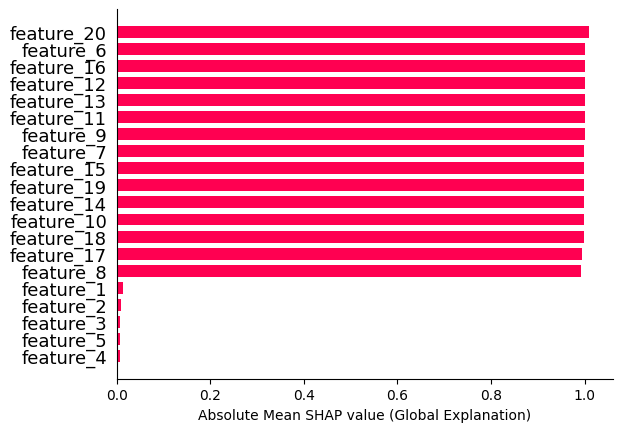

In [25]:
global_bar_plot(mean_abs_shap_values, feature_names=columns)

In [26]:
from src.explanation_algorithms.OCSVMSHAP import OCSVMSHAP
ocsvm_shap = OCSVMSHAP(X=X_scaled, classifier=classifier)
ocsvm_shap.fit_ocsvmshap(X=X_scaled, num_coalitions=100)

Parallel projections: 100%|██████████| 101/101 [00:00<00:00, 6391.54it/s]


In [29]:
from src.utils.visualisation.deterministic_values import global_bar_plot, local_bar_plot
shapley_values = ocsvm_shap.return_deterministic_shapley_values()

_LinAlgError: linalg.cholesky: The factorization could not be completed because the input is not positive-definite (the leading minor of order 16 is not positive-definite).

The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3618.)


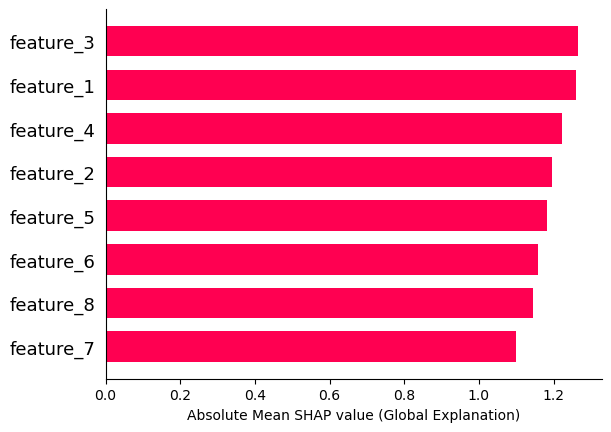

In [ ]:
# global importance measure
mean_abs_shap_values_rkhs = np.abs(shapley_values.T).mean(axis=0)  # (num_features,)

# Call bar_plot for global explanation
global_bar_plot(mean_abs_shap_values_rkhs.T, feature_names=columns)